In [1]:
import numpy as np
import math
import matplotlib.pyplot as plot
import mpl_toolkits.mplot3d.axes3d as axes3d

def cube_marginals(cube, normalize=False):
    c_fcn = np.mean if normalize else np.sum
    xy = c_fcn(cube, axis=0)
    xz = c_fcn(cube, axis=1)
    yz = c_fcn(cube, axis=2)
    return(xy,xz,yz)

def plotcube(cube,x=None,y=None,z=None,normalize=False,plot_front=False):
    """Use contourf to plot cube marginals"""
    (Z,Y,X) = cube.shape
    (xy,xz,yz) = cube_marginals(cube,normalize=normalize)
    if x == None: x = np.arange(X)
    if y == None: y = np.arange(Y)
    if z == None: z = np.arange(Z)
    
    fig = plot.figure()
    ax = fig.gca(projection='3d')

    # draw edge marginal surfaces
    offsets = (Z-1,0,X-1) if plot_front else (0, Y-1, 0)
    cset = ax.contourf(x[None,:].repeat(Y,axis=0), y[:,None].repeat(X,axis=1), xy, zdir='z', offset=offsets[0], cmap=plot.cm.coolwarm, alpha=0.75)
    cset = ax.contourf(x[None,:].repeat(Z,axis=0), xz, z[:,None].repeat(X,axis=1), zdir='y', offset=offsets[1], cmap=plot.cm.coolwarm, alpha=0.75)
    cset = ax.contourf(yz, y[None,:].repeat(Z,axis=0), z[:,None].repeat(Y,axis=1), zdir='x', offset=offsets[2], cmap=plot.cm.coolwarm, alpha=0.75)
    
    # draw wire cube to aid visualization
    ax.plot([0,X-1,X-1,0,0],[0,0,Y-1,Y-1,0],[0,0,0,0,0],'k-')
    ax.plot([0,X-1,X-1,0,0],[0,0,Y-1,Y-1,0],[Z-1,Z-1,Z-1,Z-1,Z-1],'k-')
    ax.plot([0,0],[0,0],[0,Z-1],'k-')
    ax.plot([X-1,X-1],[0,0],[0,Z-1],'k-')
    ax.plot([X-1,X-1],[Y-1,Y-1],[0,Z-1],'k-')
    ax.plot([0,0],[Y-1,Y-1],[0,Z-1],'k-')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 30])
    ax.set_ylim([0, 30])
    ax.set_zlim([0, 30])
    plot.show()

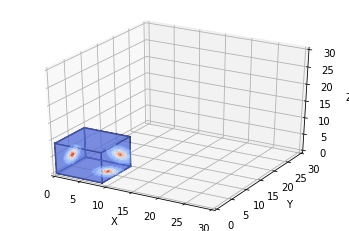

In [2]:
import numpy as np
(x,y,z) = np.mgrid[0:10,0:10, 0:10]
data = np.exp(-((x-3)**2 + (y-5)**2 + (z-7)**2)**(0.5))

edge_yz = np.sum(data,axis=0)
edge_xz = np.sum(data,axis=1)
edge_xy = np.sum(data,axis=2)

plotcube(data)

In [1]:
from data_extraction import rfImageDataSet2
dataset = rfImageDataSet2(r'B:\Vayyar_Dataset\Multicar\processed\Chevrolet_Spark_2017')
print(dataset[50])
image_power = dataset[50]['imagePower']
image_power = image_power[:,:,:24]
image_power = np.swapaxes(image_power, 0, 2)
plotcube(image_power)

{'imagePower': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 

NameError: name 'np' is not defined

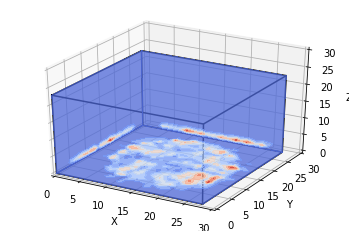

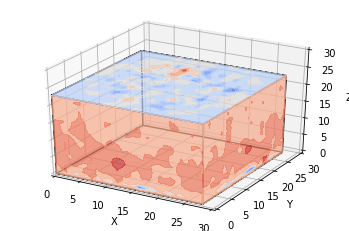

In [13]:
path = r'B:\Vayyar_Dataset\vCab_Recordings\for_martin\ford1\38.npy'
image_power = np.load(path)
image_power = image_power[:,:,:24]
image_power = np.swapaxes(image_power, 0, 2)
plotcube(image_power)

path = r'B:\Vayyar_Dataset\vCab_Recordings\for_martin\ford1\21.npy'
image_power2 = np.load(path)
image_power2 = image_power2[:,:,:24]
image_power2 = np.swapaxes(image_power2, 0, 2)
image_power2 -= image_power
plotcube(image_power2, plot_front=True)

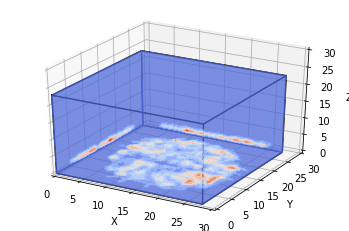

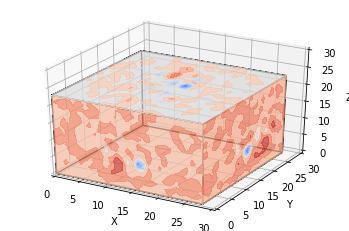

In [10]:
path = r'B:\Vayyar_Dataset\vCab_Recordings\for_martin\ford1\20.npy'
image_power = np.load(path)
image_power = image_power[:,:,:24]
image_power = np.swapaxes(image_power, 0, 2)
plotcube(image_power)

path = r'B:\Vayyar_Dataset\vCab_Recordings\for_martin\ford1\21.npy'
image_power2 = np.load(path)
image_power2 = image_power2[:,:,:24]
image_power2 = np.swapaxes(image_power2, 0, 2)
image_power2 -= image_power
plotcube(image_power2, plot_front=True)

In [ ]:
from LSTM_Vayyar import *
from data_extraction_for_martin import rfImageDataSet2

train_dataset1 = rfImageDataSet(r'B:\Vayyar_Dataset\small_data\for_martin_vcab\ford1') # ford 1
X_train1, y_train1=sample_label_extraction(train_dataset1)
y_train1 = np.array(y_train1)
print('X_train1.shape', X_train1.shape)
print('y_train1.shape', y_train1.shape)
print('The Name of training classess - y_train1',np.unique(y_train1))
# print('train_dataset1[0]',train_dataset1[0])
# To get a distribution of the classes
print('train_dataset1.class_distribution()',train_dataset1.class_distribution())
# To get the mean and std of the entire dataset
print('train_dataset1.mean_and_std()',train_dataset1.mean_and_std())
train_dataset2 = rfImageDataSet(r'B:\Vayyar_Dataset\small_data\for_martin_vcab\ford1_center') #ford1_center
X_train2, y_train2=sample_label_extraction(train_dataset2)
y_train2 = np.array(y_train2)
print('X_train2.shape', X_train2.shape)
print('y_train2.shape', y_train2.shape)
print('The Name of training classess - y_train2',np.unique(y_train2))
# print('train_dataset2[0]',train_dataset2[0])
# To get a distribution of the classes
print('train_dataset2.class_distribution()',train_dataset2.class_distribution())
# To get the mean and std of the entire dataset
print('train_dataset2.mean_and_std()',train_dataset2.mean_and_std())
train_dataset3 = rfImageDataSet(r'B:\Vayyar_Dataset\small_data\for_martin_vcab\ford2') #ford2
# if the sampel is Ford 2
X_train3, y_train3=sample_label_extraction(train_dataset3)
y_train3 = np.array(y_train3)
#
print('X_train3.shape', X_train3.shape)
print('y_train3.shape', y_train3.shape)
print('The Name of training classess - y_train3',np.unique(y_train3))
# print('train_dataset3[0]',train_dataset3[0])
# To get a distribution of the classes
print('train_dataset3.class_distribution()',train_dataset3.class_distribution())
# To get the mean and std of the entire dataset
print('train_dataset3.mean_and_std()',train_dataset3.mean_and_std())
X_train=np.concatenate((X_train1, X_train2,X_train3))
y_train=np.concatenate((y_train1, y_train2, y_train3))


test_dataset = rfImageDataSet(r'B:\Vayyar_Dataset\small_data\for_martin_vcab\ford2_center') #ford2_center
X_val, y_val = sample_label_extraction(test_dataset)
y_val = np.array(y_val)
# print('test_dataset[0]',test_dataset[0])
# To get a distribution of the classes
print('test_dataset.class_distribution()',test_dataset.class_distribution())
# To get the mean and std of the entire dataset
print('test_dataset.mean_and_std()',test_dataset.mean_and_std())
X_train = np.array(X_train)
y_train = np.array(y_train)
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
y_cat = to_categorical(y_train)
print('y_cat', y_cat)

print('X_val.shape', X_val.shape)
print('y_val.shape', y_val.shape)

In [1]:
import os
import numpy as np
import json
import scipy.io as sio
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import *
from utilities import importDataFromMatFiles, loadData, scenarioWiseTransformLabels, getConfusionMatrices, seatWiseTransformLabels, plot_seat_wise_bar, multiclass_metric
from torchvision import transforms
from data_prep import rfImageDataSet, cropR
#import pkbar
import math
from torch.utils.tensorboard import SummaryWriter
import argparse
import seaborn as sn

from data_extraction_for_martin import rfImageDataSet2
train_dataset1 = rfImageDataSet2(r'B:\Vayyar_Dataset\small_data\for_martin_vcab\ford1') # ford 1

mean, std = train_dataset1.mean_and_std()
for i in range(len(train_dataset1)):
    image = train_dataset1[i]['imagePower']
    train_dataset1[i]['imagePower'] = (image - mean) / std

#%% Create model
class CNNModelRC(nn.Module):
    def __init__(self, num_classes):
        super(CNNModelRC, self).__init__()
        self.conv_layer1 = self._conv_layer_set(1, 32)
        self.conv_layer2 = self._conv_layer_set(32, 64)
        self.fc1 = nn.Linear(64*7*7*6, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.LeakyReLU()
        # self.batch=nn.BatchNorm1d(128)
        self.drop=nn.Dropout(p=0.15) 
        self.softmax=nn.LogSoftmax(dim=1)        
        
    def _conv_layer_set(self, in_c, out_c):
        conv_layer = nn.Sequential(
        nn.Conv3d(in_c, out_c, kernel_size=(3, 3, 3), padding=(1,1,1)),
        nn.LeakyReLU(),
        nn.MaxPool3d((2, 2, 2)),
        )
        return conv_layer
    
    def forward(self, x):
        # Set 1
        out = self.conv_layer1(x)
        out = self.drop(out)
        out = self.conv_layer2(out)
        out = out.view(out.size(0), -1) #Flatten it out
        out = self.fc1(out)
        out = self.relu(out)
        # out = self.batch(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out
    
#%% Split training and testing dataset
train_percent = 0.9
validation_percent = 0.05
testing_percent = 0.05
total_num = len(train_dataset1)
training_num = int(train_percent * total_num)
validation_num = int(validation_percent * total_num)
testing_num = int(total_num - training_num - validation_num)

train_set, val_set, test_set = random_split(train_dataset1, [training_num, validation_num, testing_num])

#%% Build loaders
batch_size = 100
train_loader = DataLoader(
    train_set,
    batch_size=batch_size,
    num_workers=1,
    shuffle=True
)
val_loader = DataLoader(
    val_set,
    batch_size=batch_size,
    num_workers=1,
    shuffle=True
)
test_loader = DataLoader(
    test_set,
    batch_size=batch_size,
    num_workers=1,
    shuffle=True
)

# Build model
num_classes = 32
model = CNNModelRC(num_classes)
model.train() # mode = train
print(model)

error = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

C:\Users\Martin\Miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


B:\Vayyar_Dataset\vCab_Recordings\for_martin\ford1\path_label.pickle
<class 'pandas.core.series.Series'>
1    1
2    2
3    3
Name: processed_filename, dtype: int64
B:\Vayyar_Dataset\small_data\for_martin_vcab\ford1\path_label.pickle
<class 'pandas.core.series.Series'>
CNNModelRC(
  (conv_layer1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=18816, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (drop): Dropout(p=0.15, inplace=False

In [2]:
# CNN model training
num_epochs = 1000
loss_list = []
val_loss_list = []
iteration_count = 0
train_per_epoch = math.ceil(len(train_set) / batch_size)
val_per_epoch = math.ceil(len(val_set) / batch_size)


start = time.time()
for epoch in range(num_epochs):
    sum_loss = 0
    sum_val_loss = 0
    for i, sample in enumerate(train_loader):
        model.train()
        x_train = sample["imagePower"].float().to(device)
        y_train = sample["label"].view(len(x_train),).long().to(device)
        x_train = Variable(x_train.view(len(x_train), 1, 29 ,29 ,24))
        y_train = Variable(y_train)
        # Forward propagation
        outputs = model(x_train)
        # Calculate softmax and ross entropy loss
        loss = error(outputs, y_train)
        # Clear gradients
        optimizer.zero_grad()
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
#         # Write to tensorboard
#         writer.add_scalar("Loss/train", loss, epoch)
        sum_loss += loss.data
        # loss_list.append(loss.data)
        iteration_count += 1
#         print(f'Epoch {epoch + 1} Iteration {iteration_count}: loss = {loss.data}')
    loss_list.append(sum_loss/train_per_epoch)
    with torch.no_grad():
        for val_batch in val_loader:
            
            x_val = val_batch['imagePower'].float().to(device)
            y_val = val_batch['label'].view(len(x_val),).long().to(device)
            x_val = Variable(x_val.view(len(x_val), 1, 29 ,29 ,24))
            y_val = Variable(y_val)

            model.eval()
            y_val_pred = model(x_val)
            val_loss = error(y_val_pred, y_val) 
#             # Write to tensorboard
#             writer.add_scalar("Loss/validation", val_loss, epoch)
            sum_val_loss += val_loss.data
            # val_loss_list.append(val_loss.data)
    val_loss_list.append(sum_val_loss/val_per_epoch)
    print('done validation')
    print("Epoch {}, Loss: {}".format(epoch+1, sum_loss/train_per_epoch))
    print("Epoch {}, Val Loss: {}".format(epoch+1, sum_val_loss/val_per_epoch))
# writer.flush()
# writer.close()
end = time.time()
print(f'duration = {end - start}s')

done validation
Epoch 1, Loss: 48.377647399902344
Epoch 1, Val Loss: 5.345430850982666


KeyboardInterrupt: 

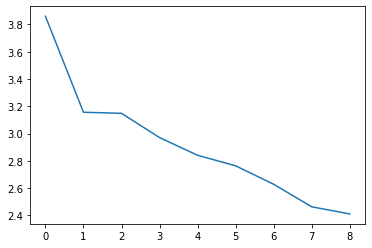

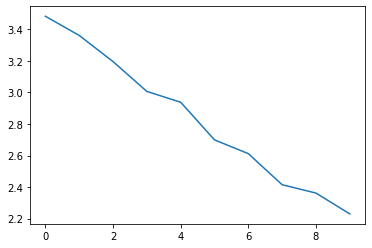

In [11]:
plt.plot(loss_list[1:])
plt.show()
plt.plot(val_loss_list)
plt.show()